In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv(r"C:\Users\RAHUL KUMHAR\Python learning licenses\Sales data\Sales_April_2019.csv")

file = [file for file in os.listdir('Sales data')]

all_months_data = pd.DataFrame()

for file in file:
    df = pd.read_csv(f'Sales data/{file}')
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv", index=False)

In [3]:
all_months_data.shape

(186850, 6)

In [4]:
All_data = pd.read_csv('all_data.csv')
All_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
all_months_data.shape

(186850, 6)

*Updated dataframe*

In [6]:
all_data  =pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]

*Data Cleaning*


In [9]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
all_data1 = all_data.dropna(how = 'all')
all_data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [11]:

all_data2 = all_data1[all_data1['Order Date'].str[0:2] !='Or']
all_data2.head()
all_data3 = all_data2.copy()

In [12]:
all_data3['Month'] = all_data3['Month'].astype('int')
all_data3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [13]:
all_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [14]:

all_data3['Quantity Ordered'] = pd.to_numeric(all_data3['Quantity Ordered'])
all_data3['Price Each'] = pd.to_numeric(all_data3['Price Each'])

In [15]:
all_data3['Sales'] = all_data3['Quantity Ordered']*all_data3['Price Each']
all_data3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [16]:
all_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 12.1+ MB


**1. Best month for sales**


In [17]:
result = all_data3.groupby('Month').sum()


Text(0, 0.5, 'Sales in USD ($)')

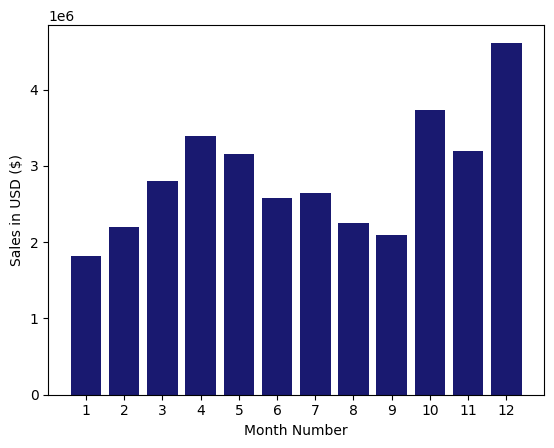

In [18]:
Months = range(1,13)
plt.bar(Months,result['Sales'],color='midnightblue')
plt.xticks(Months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')

*The analysis indicates that December saw the highest sales, totaling 4.61 million($, likely driven by the holiday season and end-of-year spending. In contrast, January experienced the lowest sales, with a total of 1.82 million, possibly due to post-holiday spending reductions and the impact of consumer budget adjustments at the start of the year.*

**2. City that had the highest number of Sales**

In [19]:
all_data3['City'] = all_data3['Purchase Address'].apply(lambda x:x.split(',')[1])
all_data3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [20]:
results2 = all_data3.groupby('City').sum()
# results2

Text(0, 0.5, 'Sales in USD ($)')

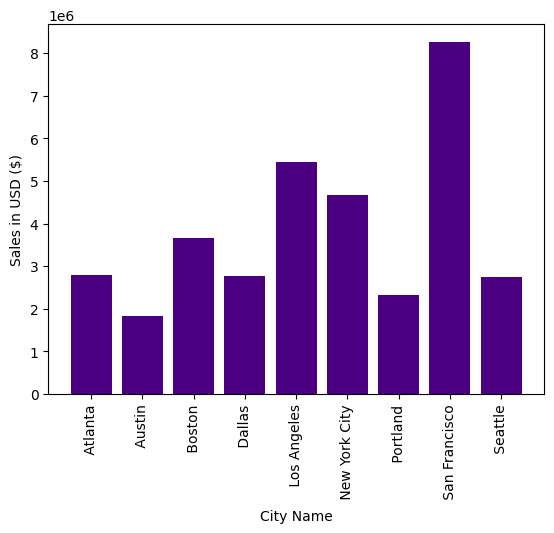

In [21]:
cities =[city for city ,df in all_data3.groupby('City')]

plt.bar(cities,results2['Sales'],color='indigo')
plt.xticks(cities,rotation = 'vertical')
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')


*San Francisco's electronic product sales were significantly higher than Austin's. The city recorded a total revenue of 8.26 million, while Austin's sales amounted to 1.82 million.*

**3. The time we should display advertisments to maximize likelihood of customer's buying products**

In [24]:
all_data3['Order Date']= pd.to_datetime(all_data3['Order Date'],format='%Y-%m-%d')

In [25]:
all_data3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [26]:
all_data3['Hour']= all_data3['Order Date'].dt.hour
all_data3['Minute']= all_data3['Order Date'].dt.minute
all_data3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


Text(0, 0.5, 'Quantity Ordered')

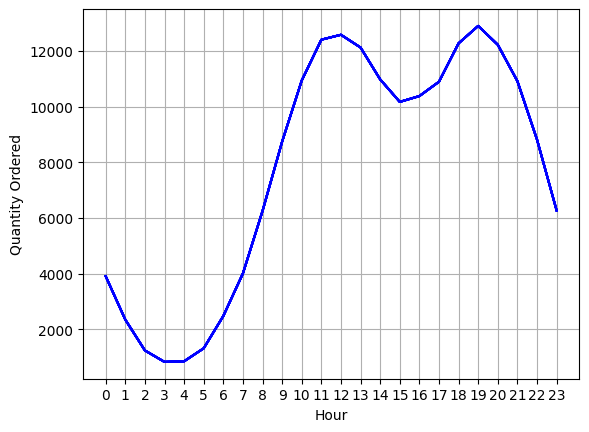

In [27]:
hours = [hour for hour,df in all_data3.groupby('Hour')]
plt.plot(hours, all_data3.groupby(['Hour']).count(),color= 'blue')
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Quantity Ordered')

*The graph reveals that the quantity of orders peaks around 12 PM and 7 PM, likely due to lunch breaks and post-work shopping. To maximize sales, businesses should focus on advertising during these peak hours, offering time-specific promotions, and ensuring a seamless mobile shopping experience. Additionally, leveraging social media to engage with customers at these times can further enhance marketing efforts.*

In [28]:
all_data3.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


**4. Most sold products**

Text(0, 0.5, 'Quantity Ordered')

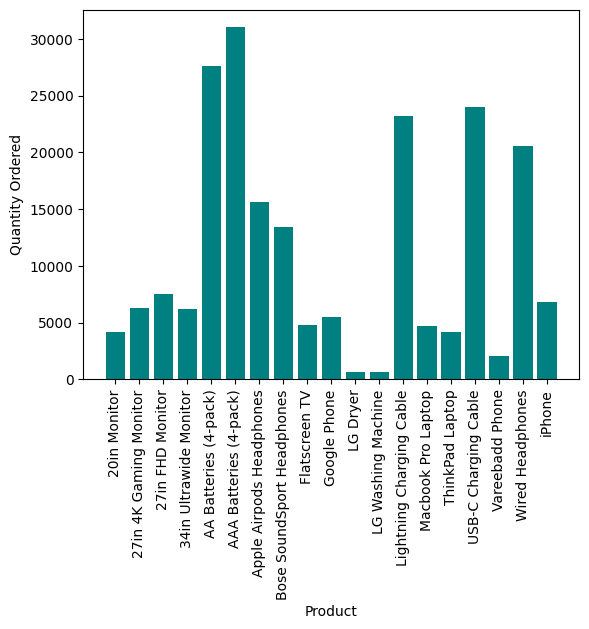

In [29]:
product_group = all_data3.groupby('Product')
quantity_ordered=product_group['Quantity Ordered'].sum()
products = quantity_ordered.index
plt.bar(products,quantity_ordered,color='teal')
plt.xticks(products,rotation ='vertical')

plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

*AAA batteries(4-pack) emerged as the most popular product, followed by AA batteries(4-pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones. However, the LG Dryer recorded the lowest sales, with the LG Washing Machine also selling in relatively small quantities. Notably, AA batteries were the top-selling item, with 31,017 units sold, while the LG Dryer only sold 646 units.This could be due to their higher price points, which might make them less accessible to certain customers*




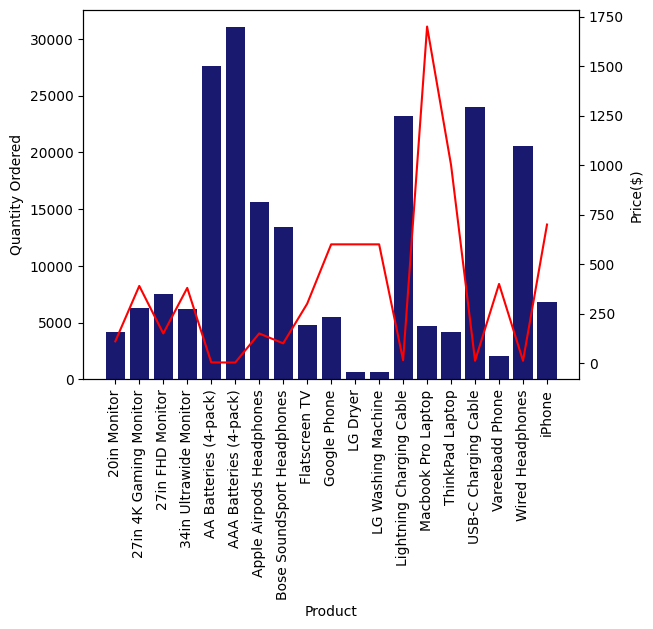

In [30]:
prices = product_group['Price Each'].mean()
fig,ax1 =plt.subplots()
ax2= ax1.twinx()
ax1.bar(products,quantity_ordered,color = 'midnightblue')
ax2.plot(products,prices,'r')
plt.xticks(products,rotation = 'vertical')
ax1.set_xticklabels(products,rotation = 'vertical')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price($)')
plt.show()

**5. Most products that sold together**

In [31]:
all_data4= all_data3.copy()
all_data4= all_data4[all_data3['Order ID'].duplicated(keep = False)]

all_data4['Total Ordered Products'] = all_data4.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
all_data4.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Total Ordered Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [32]:
all_data5 = all_data4.copy()
all_data5 = all_data4[['Order ID','Total Ordered Products']].drop_duplicates()
all_data5.head(10)

,Order ID,Total Ordered Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [33]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in all_data5['Total Ordered Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)
    


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

*The output data shows that the most commonly ordered product pair is the iPhone with a Lightning Charging Cable (1005 occurrences), indicating a strong preference for buying these items together. On the other hand, the least ordered pair in the top ten is the Lightning Charging Cable with Wired Headphones (92 occurrences). This suggests that while charging cables and headphones are essential, they are less frequently purchased together compared to phone and accessory combinations.*